In [1]:
import os 
import pandas as pd
import numpy  as np
from ML_introvert import logger


In [2]:
os.chdir('../')
logger.info("change to the root dir ")


[2025-07-31 12:32:00,425] INFO : logger: change to the root dir 


In [3]:
os.getcwd()

'/workspaces/Introverts_Prediction_from_the_Extroverts'

In [4]:

df = pd.read_csv('data/raw/data.csv')



In [5]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns=['id'],inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [12]:
df.Personality.value_counts(normalize=True)

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64

Imbalaved dataset


In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.model_selection import train_test_split ,cross_val_score 

In [14]:
X = df.drop(columns=['Personality'])
Y = df.Personality

In [15]:
X = pd.get_dummies(X)
X.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.0,6.0,4.0,15.0,5.0,True,False,True,False
1,1.0,7.0,3.0,10.0,8.0,True,False,True,False
2,6.0,1.0,0.0,3.0,0.0,False,True,False,False
3,3.0,7.0,3.0,11.0,5.0,True,False,True,False
4,1.0,4.0,4.0,13.0,NaN,True,False,True,False


In [16]:
encoder =LabelEncoder()
Y=encoder.fit_transform(Y)
Y

array([0, 0, 1, ..., 1, 1, 0], shape=(18524,))

In [17]:
X[['Stage_fear_Yes','Stage_fear_No','Drained_after_socializing_No','Drained_after_socializing_Yes']]=X[['Stage_fear_Yes','Stage_fear_No','Drained_after_socializing_No','Drained_after_socializing_Yes']].astype('int')

In [18]:
X

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.0,6.0,4.0,15.0,5.0,1,0,1,0
1,1.0,7.0,3.0,10.0,8.0,1,0,1,0
2,6.0,1.0,0.0,3.0,0.0,0,1,0,0
3,3.0,7.0,3.0,11.0,5.0,1,0,1,0
4,1.0,4.0,4.0,13.0,NaN,1,0,1,0
...,...,...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.0,1,0,1,0
18520,1.0,6.0,7.0,6.0,5.0,0,0,1,0
18521,7.0,1.0,1.0,1.0,NaN,0,1,0,1
18522,NaN,1.0,0.0,5.0,2.0,0,1,0,1


In [19]:
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

In [20]:
X_train.shape ,X_test.shape,Y_train.shape,Y_test.shape

((14819, 9), (3705, 9), (14819,), (3705,))

In [21]:
from sklearn.metrics import roc_auc_score,f1_score 
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [22]:
from sklearn.metrics import confusion_matrix

In [135]:
model = XGBClassifier(n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.1,
    colsample_bytree=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    early_stopping_rounds=10 ,
    random_state=42)

model.fit(X_train,Y_train, eval_set=[(X_test, Y_test)],
    )

[0]	validation_0-logloss:0.56686
[1]	validation_0-logloss:0.56027
[2]	validation_0-logloss:0.55390
[3]	validation_0-logloss:0.54775
[4]	validation_0-logloss:0.54192
[5]	validation_0-logloss:0.53616
[6]	validation_0-logloss:0.53039
[7]	validation_0-logloss:0.52470
[8]	validation_0-logloss:0.51919
[9]	validation_0-logloss:0.51364
[10]	validation_0-logloss:0.50853
[11]	validation_0-logloss:0.50324
[12]	validation_0-logloss:0.49826
[13]	validation_0-logloss:0.49242
[14]	validation_0-logloss:0.48742
[15]	validation_0-logloss:0.48257
[16]	validation_0-logloss:0.47780
[17]	validation_0-logloss:0.47280
[18]	validation_0-logloss:0.46844
[19]	validation_0-logloss:0.46400
[20]	validation_0-logloss:0.45937
[21]	validation_0-logloss:0.45511


/workspaces/Introverts_Prediction_from_the_Extroverts/venv/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [13:10:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[22]	validation_0-logloss:0.45099
[23]	validation_0-logloss:0.44664
[24]	validation_0-logloss:0.44259
[25]	validation_0-logloss:0.43871
[26]	validation_0-logloss:0.43484
[27]	validation_0-logloss:0.43109
[28]	validation_0-logloss:0.42669
[29]	validation_0-logloss:0.42320
[30]	validation_0-logloss:0.41983
[31]	validation_0-logloss:0.41626
[32]	validation_0-logloss:0.41228
[33]	validation_0-logloss:0.40891
[34]	validation_0-logloss:0.40558
[35]	validation_0-logloss:0.40216
[36]	validation_0-logloss:0.39834
[37]	validation_0-logloss:0.39523
[38]	validation_0-logloss:0.39193
[39]	validation_0-logloss:0.38876
[40]	validation_0-logloss:0.38595
[41]	validation_0-logloss:0.38233
[42]	validation_0-logloss:0.37908
[43]	validation_0-logloss:0.37563
[44]	validation_0-logloss:0.37271
[45]	validation_0-logloss:0.37001
[46]	validation_0-logloss:0.36708
[47]	validation_0-logloss:0.36410
[48]	validation_0-logloss:0.36129
[49]	validation_0-logloss:0.35857
[50]	validation_0-logloss:0.35581
[51]	validatio

[90]	validation_0-logloss:0.27052
[91]	validation_0-logloss:0.26903
[92]	validation_0-logloss:0.26743
[93]	validation_0-logloss:0.26589
[94]	validation_0-logloss:0.26418
[95]	validation_0-logloss:0.26283
[96]	validation_0-logloss:0.26109
[97]	validation_0-logloss:0.25976
[98]	validation_0-logloss:0.25847
[99]	validation_0-logloss:0.25711
[100]	validation_0-logloss:0.25543
[101]	validation_0-logloss:0.25411
[102]	validation_0-logloss:0.25243
[103]	validation_0-logloss:0.25109
[104]	validation_0-logloss:0.24963
[105]	validation_0-logloss:0.24842
[106]	validation_0-logloss:0.24720
[107]	validation_0-logloss:0.24585
[108]	validation_0-logloss:0.24467
[109]	validation_0-logloss:0.24344
[110]	validation_0-logloss:0.24232
[111]	validation_0-logloss:0.24112
[112]	validation_0-logloss:0.23997
[113]	validation_0-logloss:0.23870
[114]	validation_0-logloss:0.23755
[115]	validation_0-logloss:0.23615
[116]	validation_0-logloss:0.23493
[117]	validation_0-logloss:0.23369
[118]	validation_0-logloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [136]:
prediction=model.predict(X_test)
proba=model.predict_proba(X_test)

In [137]:
confusion_matrix(Y_test,prediction)

array([[2690,   50],
       [  56,  909]])

In [122]:
f1_score(Y_test,prediction)

0.9453409682457053

In [123]:
roc_auc_score(Y_test,prediction)

np.float64(0.9617071971559321)

In [ ]:
from sklearn.metrics import roc_curve,auc    

In [138]:
fpr,tpr,thresoulds =roc_curve(Y_test,proba[:,1])
auc_result = auc(fpr,tpr)

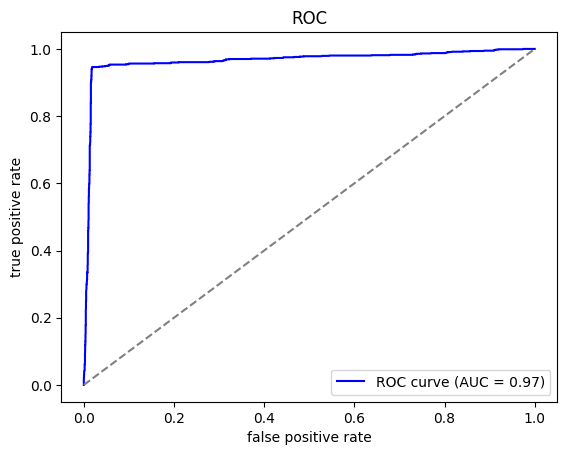

In [141]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,color='blue',label=f'ROC curve (AUC = {auc_result:.2f})')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.title('ROC')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()

